<a href="https://colab.research.google.com/github/NguyenthanhTung14/Nguy-nThanhT-ng/blob/main/baitap_tien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
folder = '/content/drive/MyDrive/FILE_ANH_AI/Tonghophinhtien/'
photos, labels = list(), list()
for file in listdir(folder):
  output= 0.0
  if file.startswith('005000'):
    output= 1.0
  if file.startswith('010000'):
    output= 2.0
  if file.startswith('050000'):
    output= 3.0
  if file.startswith('100000'):
    output= 4.0
  if file.startswith('200000'):
    output= 5.0
  if file.startswith('500000'):
    output= 6.0
  photo = load_img(folder + file, target_size= (144,108))
  photo= img_to_array(photo)

  photos.append(photo)
  labels.append(output)

In [4]:
photos= asarray(photos)
labels= asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/npy_Data/vietnamese_currency', photos)
save('/content/drive/MyDrive/npy_Data/vietnamese_currency', labels)

(1462, 144, 108, 3) (1462,)


In [5]:
# Split data into train & test
split_index = int(0.05 * len(photos))
test_x, test_y = photos[:split_index], labels[:split_index]
train_x, train_y = photos[split_index:], labels[split_index:]

In [40]:
print(test_x.shape, train_x.shape)

(73, 144, 108, 3) (1389, 144, 108, 3)


In [6]:
train_x = train_x.reshape((1389, 144, 108, 3))
train_x = train_x.astype('float32')/255

test_x = test_x.reshape((73, 144, 108, 3))
test_x = test_x.astype('float32')/255

In [7]:
from keras.utils import to_categorical
train_y = to_categorical(train_y,7)
test_y = to_categorical(test_y,7)

In [8]:
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization,Input
from keras.optimizers import Adam
from keras import losses
loss = losses
batch_size = 64
epochs = 40
classes = 7

In [9]:
from keras.layers import LeakyReLU
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear', input_shape = (144, 108, 3), padding= 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(256, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(512, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(1024, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

In [10]:
#Đưa vào ANN, bộ ANN để phân loại:
from keras.losses import categorical_crossentropy
model.add(Flatten())
model.add(Dense(1024, activation = 'linear'))

model.add(Dense(classes, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 144, 108, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 144, 108, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 72, 54, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 54, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 72, 54, 64)        36928     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 72, 54, 64)        0         
                                                        

In [11]:
#Compile:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
train = model.fit(train_x, train_y, batch_size= batch_size, epochs= epochs, verbose= 1)

Epoch 1/40
22/22 [==============================] - 18s 159ms/step - loss: 2.2706 - accuracy: 0.1397
Epoch 2/40
22/22 [==============================] - 2s 76ms/step - loss: 1.9159 - accuracy: 0.1814
Epoch 3/40
22/22 [==============================] - 2s 76ms/step - loss: 1.9144 - accuracy: 0.1843
Epoch 4/40
22/22 [==============================] - 2s 72ms/step - loss: 1.9010 - accuracy: 0.2354
Epoch 5/40
22/22 [==============================] - 2s 72ms/step - loss: 1.9121 - accuracy: 0.1915
Epoch 6/40
22/22 [==============================] - 2s 72ms/step - loss: 1.8086 - accuracy: 0.2585
Epoch 7/40
22/22 [==============================] - 2s 72ms/step - loss: 2.1541 - accuracy: 0.1843
Epoch 8/40
22/22 [==============================] - 2s 72ms/step - loss: 1.9822 - accuracy: 0.1785
Epoch 9/40
22/22 [==============================] - 2s 72ms/step - loss: 1.9662 - accuracy: 0.1692
Epoch 10/40
22/22 [==============================] - 2s 74ms/step - loss: 16.4735 - accuracy: 0.1937
Epoch 

In [12]:
# Evaluate model
test_loss, test_acc = model.evaluate(test_x, test_y)
print('Test accuracy:', test_acc)

3/3 [==============================] - 1s 156ms/step - loss: 1.7879 - accuracy: 0.4384
Test accuracy: 0.4383561611175537


In [13]:
model.save('/content/drive/MyDrive/data_train/modelvietnamesecurrency.h5')

1/1 [==============================] - 0s 444ms/step
1
005000


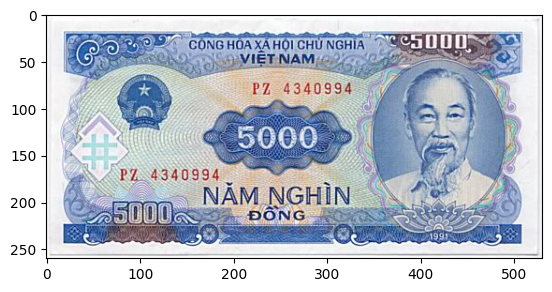

1/1 [==============================] - 0s 26ms/step
5
200000


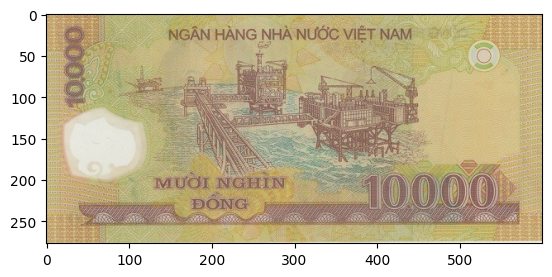

1/1 [==============================] - 0s 23ms/step
1
005000


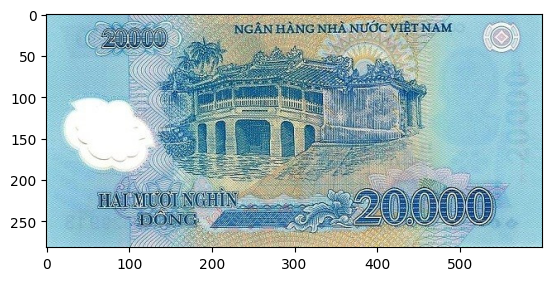

1/1 [==============================] - 0s 24ms/step
1
005000


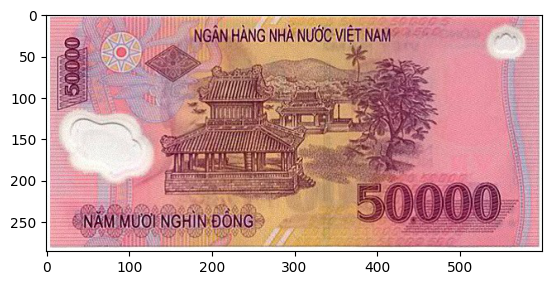

1/1 [==============================] - 0s 23ms/step
1
005000


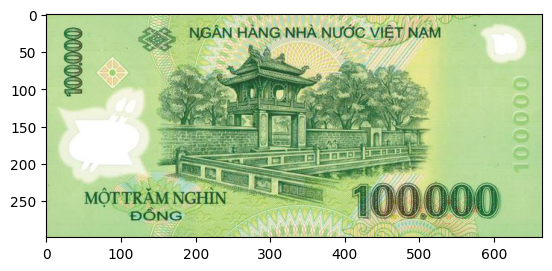

1/1 [==============================] - 0s 26ms/step
1
005000


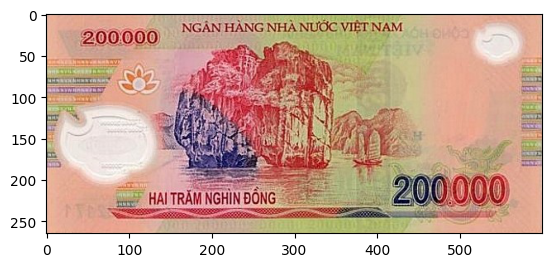

1/1 [==============================] - 0s 39ms/step
1
005000


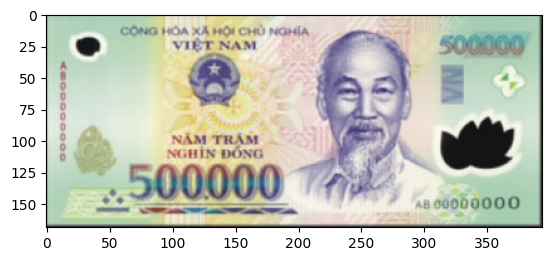

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
folder = '/content/drive/MyDrive/npy_Data/Test_tien/'
for file in listdir(folder):
  photo = load_img(folder  +  file)
  plt.imshow(photo)
  
  photo = load_img(folder +   file, target_size = (144, 108))
  photo=img_to_array(photo)
  photo=photo.astype('float32')
  photo=photo/255
  photo=np.expand_dims(photo,axis=0)
  result=(model.predict(photo).argmax())
  print(result)
  class_name=['', '005000', '010000', '050000', '100000', '200000', '500000']
  print(class_name[result])
  plt.show()